In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploading the dataset
from google.colab import files
file = files.upload() 

Saving hospital_data.csv to hospital_data.csv


In [ ]:
df = pd.read_csv('hospital_data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


Data Exploration

In [ ]:
df.dtypes  # Checking the datatype of each column

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [ ]:
categorical_variables = 'Hospital_code','Hospital_type_code','City_Code_Hospital', 'Hospital_region_code', 'Department', 'Ward_Type','Ward_Facility_Code', 'Bed_Grade', 'City_Code_Patient', 'Type_of_Admission', 'Severity_of_Illness', 'Age'
numeric_variables = 'Available_Extra_Rooms_in_Hospital', 'Visitors_with_Patient', 'Admission_Deposit'

In [ ]:
# Displaying unique categories in each categorical variable 

In [ ]:
for i in categorical_variables:
  print(i, end=': ')
  arr = df[i].unique()
  for j in arr:
    print(j, end=' ')
  print()

Hospital_code: 8 2 10 26 23 32 1 22 16 9 6 29 12 3 21 28 27 19 5 14 13 31 24 17 25 15 11 30 18 4 7 20 
Hospital_type_code: c e b a f d g 
City_Code_Hospital: 3 5 1 2 6 9 10 4 11 7 13 
Hospital_region_code: Z X Y 
Department: radiotherapy anesthesia gynecology TB & Chest disease surgery 
Ward_Type: R S Q P T U 
Ward_Facility_Code: F E D B A C 
Bed_Grade: 2.0 3.0 4.0 1.0 nan 
City_Code_Patient: 7.0 8.0 2.0 5.0 6.0 3.0 4.0 1.0 9.0 14.0 nan 25.0 15.0 12.0 10.0 28.0 24.0 23.0 20.0 11.0 13.0 21.0 18.0 16.0 26.0 27.0 22.0 19.0 31.0 34.0 32.0 30.0 29.0 37.0 33.0 35.0 36.0 38.0 
Type_of_Admission: Emergency Trauma Urgent 
Severity_of_Illness: Extreme Moderate Minor 
Age: 51-60 71-80 31-40 41-50 81-90 61-70 21-30 Nov-20 0-10 91-100 


In [ ]:
# Displaying unique categories in the target variable 'Stay'

In [ ]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

Data Pre-processing 

In [ ]:
#cleaning the data by removing errors
df.replace('Nov-20', '11-20', inplace=True) # the category '11-20' was misrepresented as 'Nov-20' in age and stay columns, therefore replace it 
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761,11-20


In [ ]:
df.isna().sum() # Checking the number of null values in each column

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
df = df.dropna(subset = ['Bed_Grade']) #dropping rows with missing values in Bed Grade column as there are only few in number

In [ ]:
df.shape

(318325, 18)

In [ ]:
df['City_Code_Patient'] = df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0]) 
# filling missing values in City_Code_Patient with mode of the column

In [ ]:
df.shape

(318325, 18)

In [ ]:
df.isna().sum() # rechecking the number of missing values

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

Data Visualization

In [ ]:
# visualizing to find the distribution of predictors

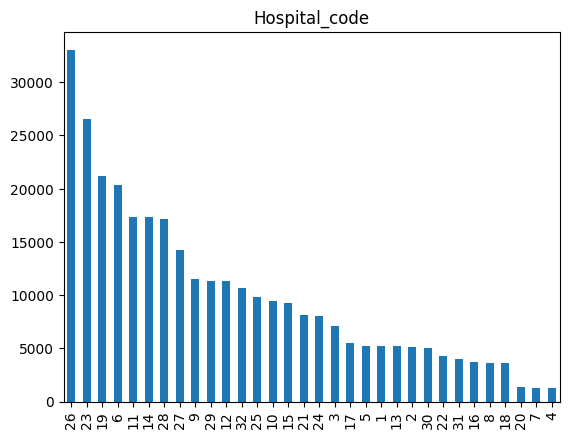

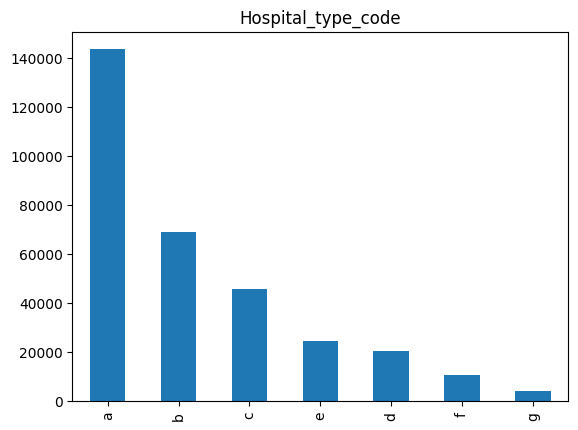

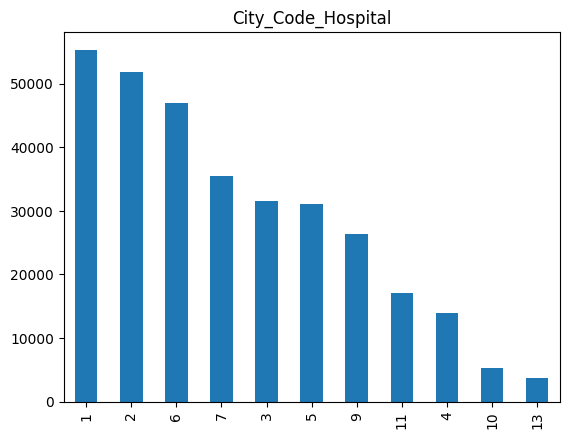

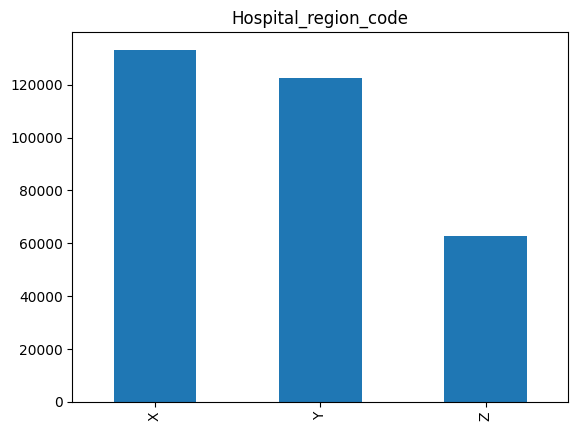

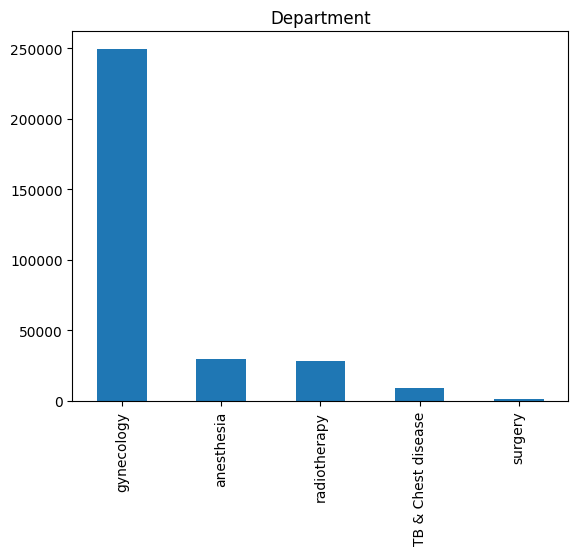

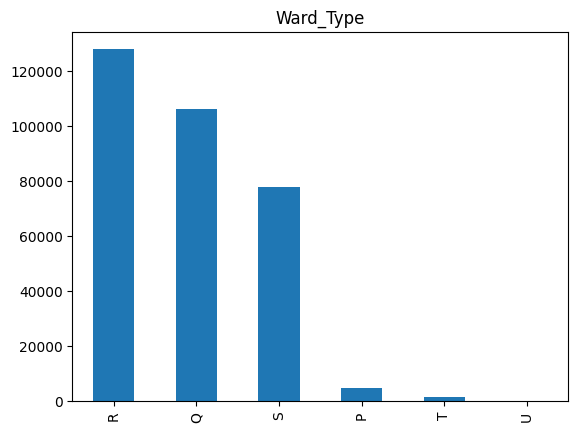

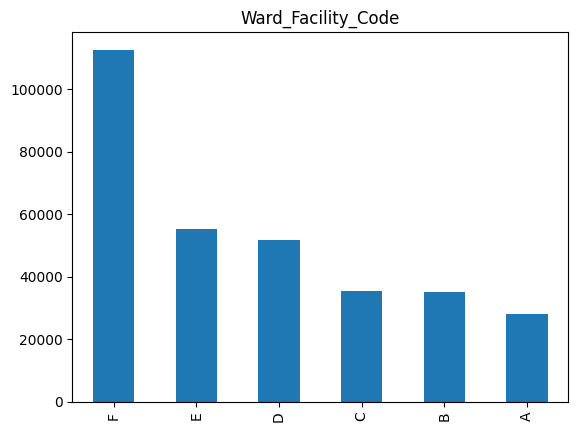

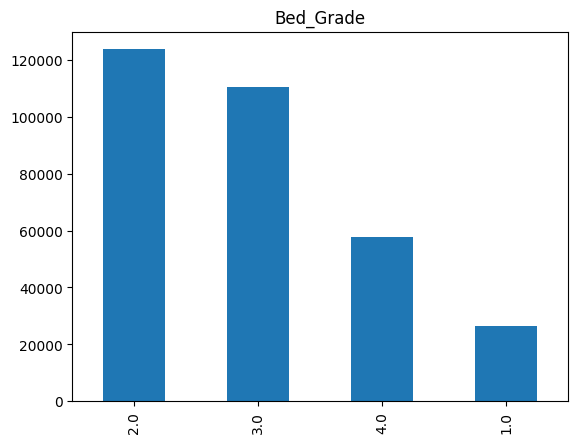

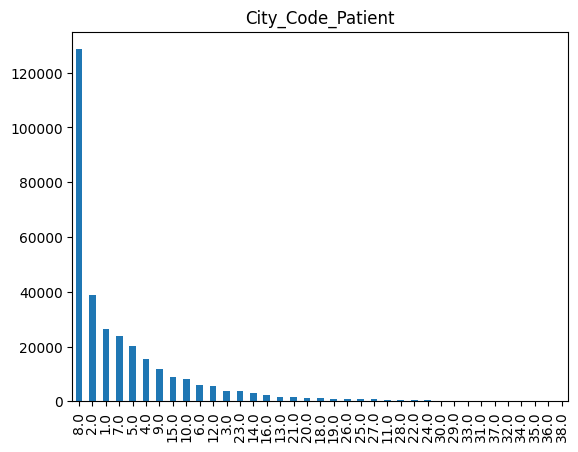

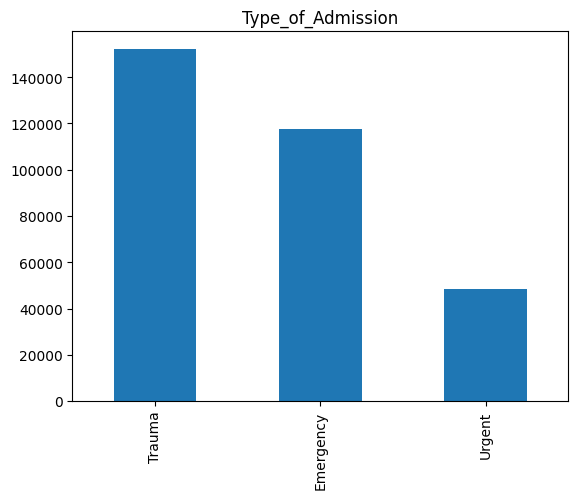

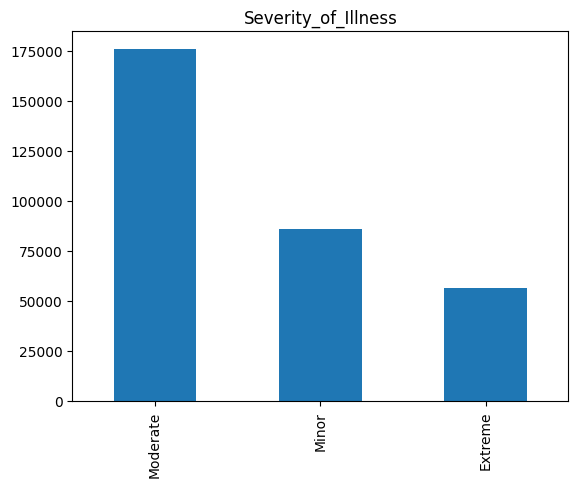

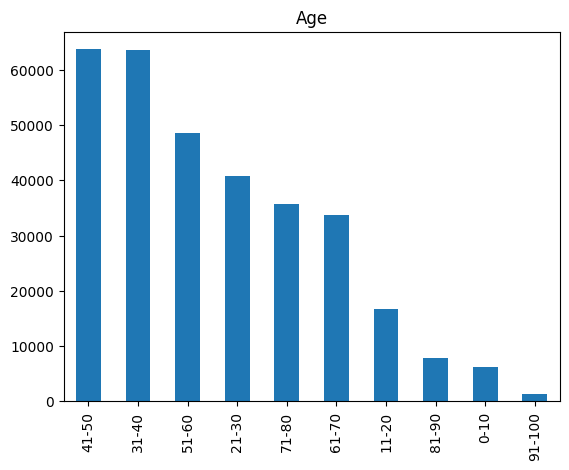

In [ ]:
for i in categorical_variables:
  ax = df[i].value_counts().plot(kind='bar')
  plt.title(i)
  plt.show()

In [ ]:
# plotting a pie chart to better understand the distribution of departments 

<Axes: title={'center': 'Pie Chart with Percentages'}, ylabel='Department'>

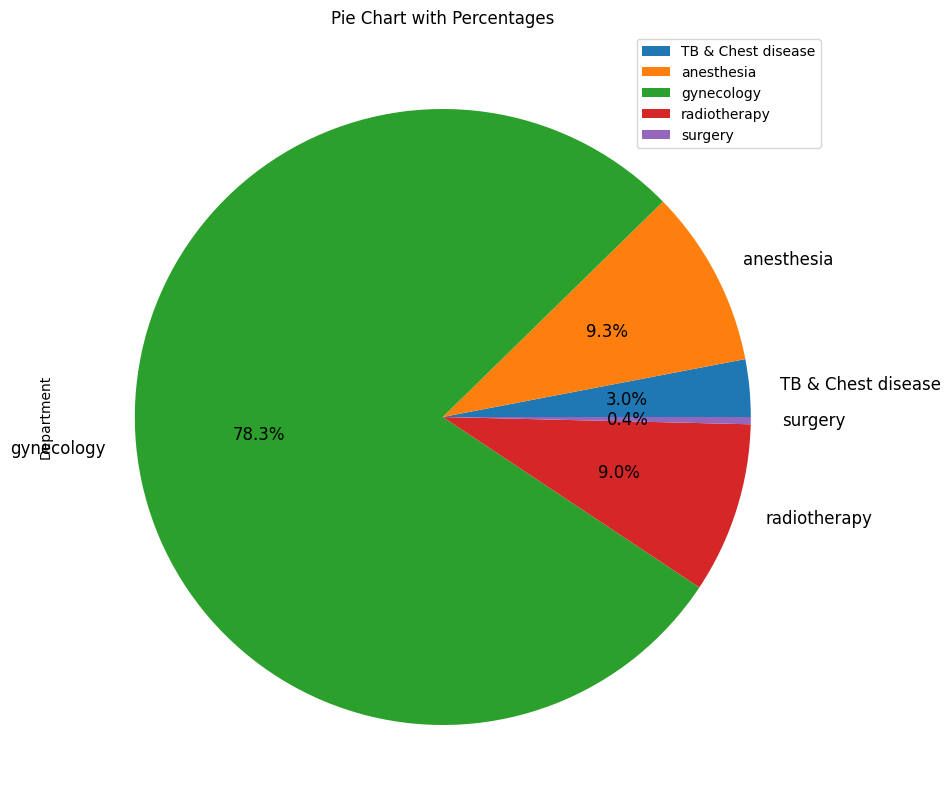

In [ ]:
df.groupby(['Department']).size().plot(kind = 'pie', ylabel = 'Department', title = 'Pie Chart with Percentages', 
                                              autopct='%1.1f%%', figsize = (10, 10), fontsize = 12, legend = True)

In [1]:
#plotting histograms of numerical variables 

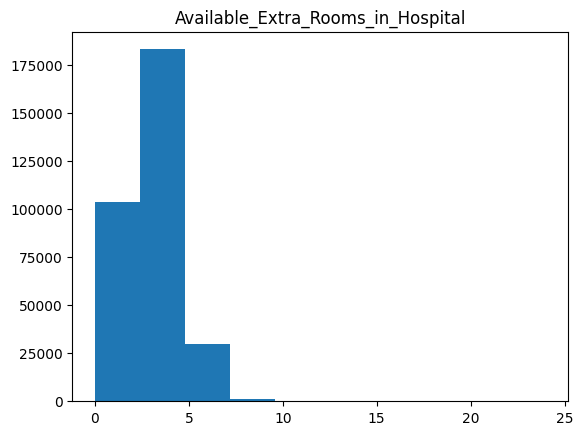

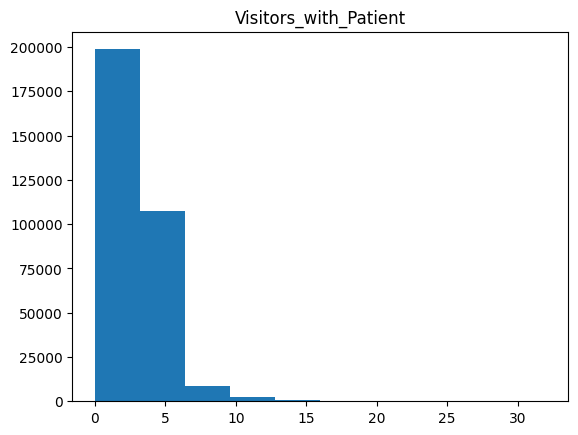

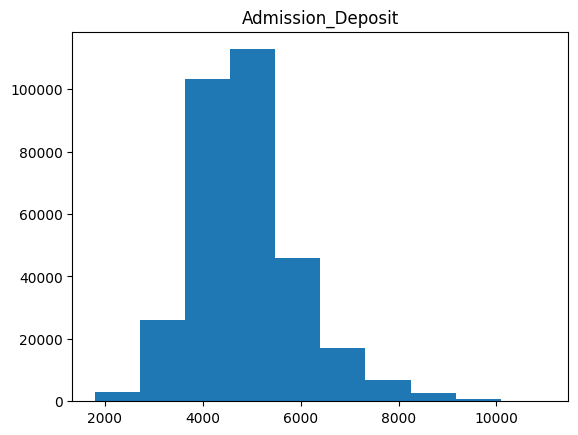

In [ ]:
numerical_variables = 'Available_Extra_Rooms_in_Hospital','Visitors_with_Patient','Admission_Deposit'
for i in numerical_variables:
   plt.figure()
   plt.hist(df[i])
   plt.title(i)

In [ ]:
# visualizing the response variable to understand the class distribution 

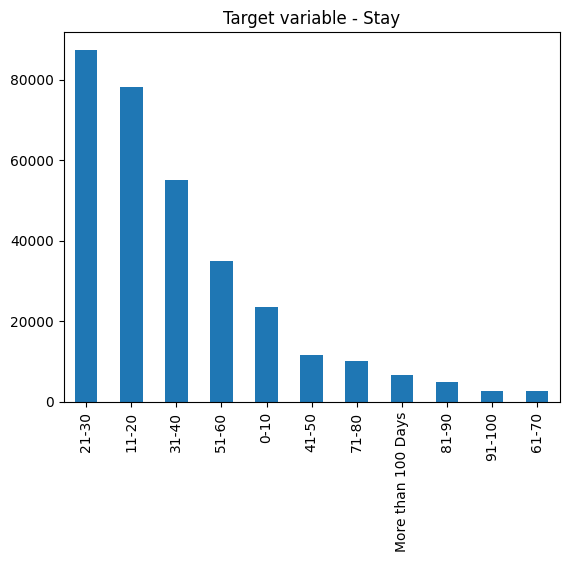

In [ ]:
ax = df['Stay'].value_counts().plot(kind='bar')
plt.title('Target variable - Stay')
plt.show()

Encoding the categorical predictors

In [ ]:
## Label encoding nominal predictors
from sklearn.preprocessing import LabelEncoder
for i in ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital','Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code','Bed_Grade','patientid','City_Code_Patient']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,30,2,5,2,3,3,2,5,1,38527,34,Emergency,Extreme,2,51-60,4911,0-10
1,2,11,2,7,2,2,3,3,5,1,38527,34,Trauma,Extreme,2,51-60,5954,41-50
2,3,1,4,0,0,2,1,3,4,1,38527,34,Trauma,Extreme,2,51-60,4745,31-40
3,4,18,1,4,1,2,3,2,3,1,38527,34,Trauma,Extreme,2,51-60,7272,41-50
4,5,18,1,4,1,2,3,3,3,1,38527,34,Trauma,Extreme,2,51-60,5558,41-50


In [ ]:
#Manually encoding ordinal variables

In [ ]:
df['Type_of_Admission'].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [ ]:
admission_dict = {'Urgent':0, 'Trauma':1, 'Emergency':2}
df.replace({'Type_of_Admission': admission_dict}, inplace = True)

In [ ]:
df['Severity_of_Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [ ]:
illness_dict = {'Extreme':2, 'Moderate':1, 'Minor':0}
df.replace({'Severity_of_Illness': illness_dict}, inplace = True)

In [ ]:
df['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [ ]:
age_dict = {'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9}
df.replace({'Age': age_dict}, inplace = True)
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,30,2,5,2,3,3,2,5,1,38527,34,2,2,2,5,4911,0-10
1,2,11,2,7,2,2,3,3,5,1,38527,34,1,2,2,5,5954,41-50
2,3,1,4,0,0,2,1,3,4,1,38527,34,1,2,2,5,4745,31-40
3,4,18,1,4,1,2,3,2,3,1,38527,34,1,2,2,5,7272,41-50
4,5,18,1,4,1,2,3,3,3,1,38527,34,1,2,2,5,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,28,0,8,0,3,3,1,5,3,81523,14,2,1,3,4,4144,11-20
318434,318435,16,0,0,0,2,1,1,4,3,39367,35,0,1,4,8,6699,31-40
318435,318436,29,0,6,0,3,2,2,5,3,19539,1,2,0,3,7,4235,11-20
318436,318437,2,1,4,1,3,1,1,3,2,85104,35,1,0,5,1,3761,11-20


Encoding the categories in target variable 'Stay'

In [ ]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
stay_dict = {'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9, 'More than 100 Days':10}
df.replace({'Stay': stay_dict}, inplace = True)
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,30,2,5,2,3,3,2,5,1,38527,34,2,2,2,5,4911,0
1,2,11,2,7,2,2,3,3,5,1,38527,34,1,2,2,5,5954,4
2,3,1,4,0,0,2,1,3,4,1,38527,34,1,2,2,5,4745,3
3,4,18,1,4,1,2,3,2,3,1,38527,34,1,2,2,5,7272,4
4,5,18,1,4,1,2,3,3,3,1,38527,34,1,2,2,5,5558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,28,0,8,0,3,3,1,5,3,81523,14,2,1,3,4,4144,1
318434,318435,16,0,0,0,2,1,1,4,3,39367,35,0,1,4,8,6699,3
318435,318436,29,0,6,0,3,2,2,5,3,19539,1,2,0,3,7,4235,1
318436,318437,2,1,4,1,3,1,1,3,2,85104,35,1,0,5,1,3761,1


Finding the relationship of predictors with response variable 

In [ ]:
# Since the response variable is categorical and ordered, use Kendall Rank Correlation Coefficient (Kendall's Tau) to find the association between ordered categorical predictors and response variable

In [ ]:
from scipy.stats import kendalltau

# Identify the ordered categorical input variable and response variable in the dataset
ordered_categorical_predictors = 'Type_of_Admission','Severity_of_Illness','Age'
ordered_response_var = 'Stay'

# Calculate Kendall's tau and its p-value
for i in ordered_categorical_predictors:
  tau, p = kendalltau(df[i], df[ordered_response_var])
  print("Kendall's tau:", tau)
  print("P-value:", p)

Kendall's tau: -0.047048412212309924
P-value: 3.819181063646705e-216
Kendall's tau: 0.10931745434050788
P-value: 0.0
Kendall's tau: 0.0700812260552696
P-value: 0.0


**The p-values for all three variables indicate that 'Type_of_Admission', 'Severity_of_Illness', 'Age' are highly significant for prediction of 'Stay'.**

In [ ]:
# Use Spearman's Rank Correlation Coefficient (Spearman's Rho) to find the association between unordered categorical predictors and response variable

In [ ]:
from scipy.stats import spearmanr

unordered_categorical_predictors = 'Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed_Grade','patientid','City_Code_Patient'
ordered_response_var = 'Stay'
# calculate Spearman's rank correlation coefficient
for i in unordered_categorical_predictors:
 rho, p_value = spearmanr(df[i], df[ordered_response_var])
 print("Spearman's rank correlation coefficient:", rho)
 print("p-value:", p_value)

Spearman's rank correlation coefficient: 0.022412521185368996
p-value: 1.1659918478058354e-36
Spearman's rank correlation coefficient: 0.06648877074054381
p-value: 1.186386233997727e-308
Spearman's rank correlation coefficient: -0.02366613428196435
p-value: 1.1177237136557954e-40
Spearman's rank correlation coefficient: 0.007349349305588868
p-value: 3.3750117563634684e-05
Spearman's rank correlation coefficient: 0.026326901628815652
p-value: 6.339106455805078e-50
Spearman's rank correlation coefficient: 0.16167351791632936
p-value: 0.0
Spearman's rank correlation coefficient: 0.007952354613051752
p-value: 7.230242236353188e-06
Spearman's rank correlation coefficient: -0.0018584423736621595
p-value: 0.2943919511271515
Spearman's rank correlation coefficient: 0.0007460716962956892
p-value: 0.6738030737545939
Spearman's rank correlation coefficient: 0.037596397610964484
p-value: 6.320195502744297e-100


**All the p-values are extremely close to 0, indicating that all unordered categorical variables are also highly significant for prediction of 'Stay'.**

Finding the relation of categorical input variables with each other

In [ ]:
# Spearman's Rank Correlation Coefficient (Spearman's Rho) can be used for both ordered and unordered categorical variables, so use it to find association of all categorical input variables 

In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Create a DataFrame with the categorical variables
df1 = df.drop(['Available_Extra_Rooms_in_Hospital','Visitors_with_Patient','Admission_Deposit','Stay'], axis=1)    

# Compute Spearman's rank correlation coefficient for each pair of variables
spearman_corrs = {}
for i, var1 in enumerate(df1.columns):
    for j, var2 in enumerate(df1.columns):
        if j > i:
            corr, pval = spearmanr(df1[var1], df1[var2])
            spearman_corrs[(var1, var2)] = (corr, pval)

# Print the results
for pair, corr in spearman_corrs.items():
    print(f"Spearman's rank correlation coefficient between {pair[0]} and {pair[1]}: {corr[0]:.3f}, p-value: {corr[1]:.3f}")

Spearman's rank correlation coefficient between case_id and Hospital_code: 0.000, p-value: 0.849
Spearman's rank correlation coefficient between case_id and Hospital_type_code: 0.002, p-value: 0.324
Spearman's rank correlation coefficient between case_id and City_Code_Hospital: -0.004, p-value: 0.027
Spearman's rank correlation coefficient between case_id and Hospital_region_code: 0.004, p-value: 0.013
Spearman's rank correlation coefficient between case_id and Department: -0.000, p-value: 0.941
Spearman's rank correlation coefficient between case_id and Ward_Type: -0.029, p-value: 0.000
Spearman's rank correlation coefficient between case_id and Ward_Facility_Code: -0.008, p-value: 0.000
Spearman's rank correlation coefficient between case_id and Bed_Grade: 0.016, p-value: 0.000
Spearman's rank correlation coefficient between case_id and patientid: -0.004, p-value: 0.048
Spearman's rank correlation coefficient between case_id and City_Code_Patient: -0.025, p-value: 0.000
Spearman's ra

**Spearman's rank correlation coefficient is close to zero for all the pairs of predictors, indicating that no two predictors are correlated. Therefore, dimension reduction is not necessary for this dataset.**

Feature Engineering 

In [ ]:
# The dataset consists of multiple records for each patient where patient was admitted multiple times in different hospitals of the same region and was allocated different wards for every admit.
# So, feature engineering is necessary

In [ ]:
# custom function to get the counts using case_id
def get_countid_enocde(dataframe, cols, name):
  temp = dataframe.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  dataframe = pd.merge(dataframe, temp, how='left', on= cols)
  dataframe[name] = dataframe[name].astype('float')
  dataframe[name].fillna(np.median(temp[name]), inplace = True)
  return dataframe

In [ ]:
# group case_id and patientid to get the count of multiple admits of a patient
df = get_countid_enocde(df, ['patientid'], name = 'count_of_admits_of_a_patient')

# group case_id, patientid, and Hospital_region_code to get the count of multiple admits of a patient in a hospital region
df = get_countid_enocde(df, ['patientid', 'Hospital_region_code'], name = 'count_of_admits_of_a_patient_in_hospitalregion')

# group case_id, patientid, and Ward_Facility_Code to get the count of wards allocated to a patient 
df = get_countid_enocde(df, ['patientid', 'Ward_Facility_Code'], name = 'count_of_wards_allocated_to_patient')

In [ ]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,...,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,count_of_admits_of_a_patient,count_of_admits_of_a_patient_in_hospitalregion,count_of_wards_allocated_to_patient
0,1,30,2,5,2,3,3,2,5,1,...,34,2,2,2,5,4911,0,14.0,4.0,5.0
1,2,11,2,7,2,2,3,3,5,1,...,34,1,2,2,5,5954,4,14.0,4.0,5.0
2,3,1,4,0,0,2,1,3,4,1,...,34,1,2,2,5,4745,3,14.0,4.0,2.0
3,4,18,1,4,1,2,3,2,3,1,...,34,1,2,2,5,7272,4,14.0,6.0,3.0
4,5,18,1,4,1,2,3,3,3,1,...,34,1,2,2,5,5558,4,14.0,6.0,3.0


In [ ]:
# Drop the columns used to create the new feature engineered columns to avoid duplication of information 
df = df.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

Normalization of numerical variables

In [ ]:
# After feature engineering there are 6 numerical columns in the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# The columns to normalize
columns_to_normalize = ['Available_Extra_Rooms_in_Hospital', 'Visitors_with_Patient', 'Admission_Deposit','count_of_admits_of_a_patient','count_of_admits_of_a_patient_in_hospitalregion','count_of_wards_allocated_to_patient']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,count_of_admits_of_a_patient,count_of_admits_of_a_patient_in_hospitalregion,count_of_wards_allocated_to_patient
0,30,2,5,0.125000,3,2,1,34,2,2,0.0625,5,0.337858,0,0.265306,0.083333,0.114286
1,11,2,7,0.083333,3,3,1,34,1,2,0.0625,5,0.451129,4,0.265306,0.083333,0.114286
2,1,4,0,0.083333,1,3,1,34,1,2,0.0625,5,0.319831,3,0.265306,0.083333,0.028571
3,18,1,4,0.083333,3,2,1,34,1,2,0.0625,5,0.594266,4,0.265306,0.138889,0.057143
4,18,1,4,0.083333,3,3,1,34,1,2,0.0625,5,0.408123,4,0.265306,0.138889,0.057143


Sampling the data for training and testing 

In [ ]:
# Since the class distribution in the data is highly imbalanced, take a sample in which all classes have equal number of records for training

In [ ]:
df1 = df[:200000] #Since the dataset is very large, take a sample of first 200000 records

# Group the data by Stay and take a sample of 1000 records from each class to ensure training data is balanced
sampled_df = df1.groupby('Stay', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))

# Reset the index of the sampled_df
sampled_df = sampled_df.reset_index(drop=True)

In [ ]:
sampled_df['Stay'].value_counts()

0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
Name: Stay, dtype: int64

In [ ]:
# training data
X_train = sampled_df.iloc[:,:-1]
y_train = sampled_df['Stay']

In [ ]:
# Take a stratified sample (one that is representative of the population) for testing
# To ensure that test data is new and unseen by training data, take the last 10000 records from the data and then take a stratified sample

In [ ]:
from sklearn.utils import resample
df2 = df[-10000:]
stratify_by = 'Stay'
strat_sample = resample(df2, n_samples=4000, replace=False, stratify=df2[stratify_by])
strat_sample

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,count_of_admits_of_a_patient,count_of_admits_of_a_patient_in_hospitalregion,count_of_wards_allocated_to_patient
318245,19,0,9,0.125000,2,1,3,35,1,0,0.09375,6,0.285513,1,0.000000,0.000000,0.000000
310150,20,1,2,0.125000,2,2,2,0,2,2,0.18750,6,0.173436,7,0.000000,0.000000,0.000000
317002,22,2,5,0.166667,2,2,1,35,0,1,0.06250,3,0.295287,2,0.000000,0.000000,0.000000
309181,18,1,4,0.166667,2,2,1,35,1,1,0.06250,2,0.353497,2,0.000000,0.000000,0.000000
318276,5,0,0,0.166667,0,0,3,10,1,0,0.12500,5,0.337315,2,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315078,6,2,7,0.125000,2,1,3,10,1,2,0.09375,4,0.286056,1,0.020408,0.027778,0.028571
316976,2,1,4,0.125000,2,1,1,35,2,0,0.09375,3,0.406277,0,0.000000,0.000000,0.000000
315150,15,0,8,0.125000,2,2,2,6,1,1,0.09375,4,0.270960,2,0.000000,0.000000,0.000000
309743,25,5,10,0.083333,2,3,2,9,2,0,0.12500,0,0.379344,3,0.020408,0.027778,0.028571


In [ ]:
# test data
X_test = strat_sample.iloc[:,:-1]
y_test = strat_sample['Stay']

Model Building 

Multinomial Logistic Regression 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       472
           1       0.84      0.79      0.81      1219
           2       0.65      0.48      0.55      1037
           3       0.44      0.50      0.47       610
           4       0.25      0.49      0.33       170
           5       0.55      0.55      0.55       301
           6       0.14      0.46      0.21        28
           7       0.28      0.28      0.28        78
           8       0.26      0.41      0.32        29
           9       0.21      0.25      0.23        20
          10       0.60      0.92      0.73        36

    accuracy                           0.63      4000
   macro avg       0.47      0.55      0.49      4000
weighted avg       0.67      0.63      0.64      4000



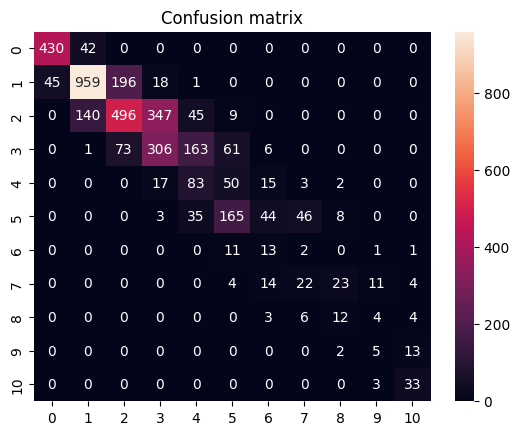

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the logistic regression model to the train data 
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test, y_pred))

scores = {}
lr_score = log_reg.score(X_test,y_test)
scores["Logistic Regression"] = lr_score  #storing the accuracy score in a dictionary to use later for comparison of models

**Insight: The multinomial logistic regression model exhibits a moderate performance, so other models have to be explored for better performance.**

K-Nearest Neighbors(KNN)

Accuracy with 1 neighbors: 0.56925
Accuracy with 2 neighbors: 0.566
Accuracy with 3 neighbors: 0.52075
Accuracy with 4 neighbors: 0.5495
Accuracy with 5 neighbors: 0.5495
Accuracy with 6 neighbors: 0.54475
Accuracy with 7 neighbors: 0.5405
Accuracy with 8 neighbors: 0.54425
Accuracy with 9 neighbors: 0.53225
Accuracy with 10 neighbors: 0.53775

Best accuracy of 0.57 was achieved with 1 neighbors.
              precision    recall  f1-score   support

           0       0.54      0.65      0.59       472
           1       0.66      0.58      0.62      1219
           2       0.58      0.52      0.55      1037
           3       0.54      0.53      0.53       610
           4       0.32      0.64      0.43       170
           5       0.75      0.58      0.66       301
           6       0.20      0.57      0.29        28
           7       0.68      0.55      0.61        78
           8       0.42      0.48      0.45        29
           9       0.34      0.60      0.44        20
     

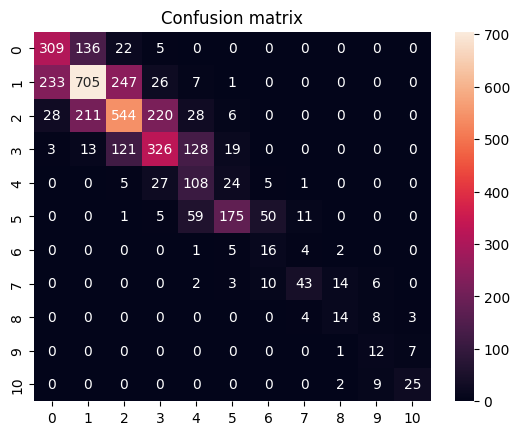

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_n_neighbors = 0

# Varying k value from 1 to 10 and checking for accuracy to select best k
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n_neighbors} neighbors:", accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print(f"\nBest accuracy of {best_accuracy:.2f} was achieved with {best_n_neighbors} neighbors.")

# Fit the knn model with best k on training data
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_train, y_train)

# Predict on test set
y_pred_best = knn_best.predict(X_test)

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test, y_pred_best))

knn_score = knn_best.score(X_test,y_test)
scores["KNN Classifier"] = knn_score    #storing the accuracy score in a dictionary to use later for comparison of models

**Insight: The KNN model performs worse than the logistic regression model. For a dataset where there are a large number of predictors, KNN should not be used. It is observed that for this data, best k value is small and hence the model is highly sensitive to noise leading to low accuracy.**

Decision Tree Classifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00      1219
           2       1.00      1.00      1.00      1037
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00       170
           5       0.61      1.00      0.76       301
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        78
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        36

    accuracy                           0.95      4000
   macro avg       0.51      0.55      0.52      4000
weighted avg       0.92      0.95      0.93      4000



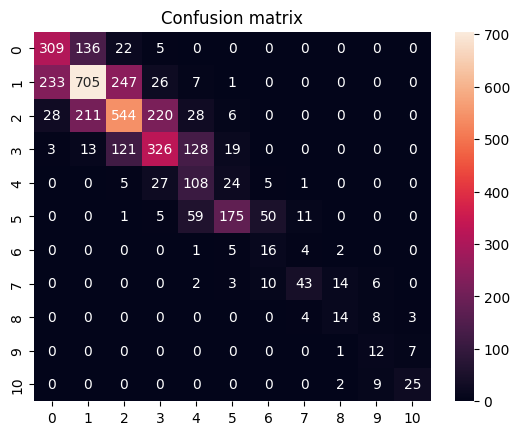

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

# Fit the decision tree classifier to the train data 
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

# Predict on test set
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_dtc))

dtc_score = dtc.score(X_test,y_test)
scores["Decision Tree Classifier"] = dtc_score   #storing the accuracy score in a dictionary to use later for comparison of models

In [ ]:
from sklearn.preprocessing import LabelBinarizer 
# Using Label Binarizer for plotting One v/s Rest ROC-AUC curve.

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(4000, 11)

In [ ]:
x = label_binarizer.classes_
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Defining class 10 i.e., stay of more than 100 days to plot one vs rest ROC-AUC curve.
# Class 10 is chosen as class of interest to identify patients with longest stay in hospitals for optimization of treatment plans to reduce length of stay
class_of_interest = 10
for i in range(x.shape[0]):
  if(x[i] == class_of_interest):
    class_id = i

class_id  # Getting the index of our class of interest.

10

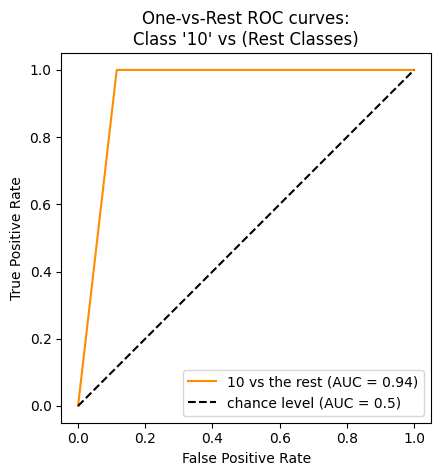

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_score = dtc.fit(X_train, y_train).predict_proba(X_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClass '10' vs (Rest Classes)")
plt.legend()
plt.show()

**Insight: A decision tree classifier exhibits very high performance. For multi-class classification problems, decision trees are one of the best choices. However, ensemble techniques have to be explored for achieving even better performance.**  

Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00      1219
           2       1.00      0.97      0.98      1037
           3       0.96      1.00      0.98       610
           4       1.00      0.99      1.00       170
           5       0.98      1.00      0.99       301
           6       0.90      1.00      0.95        28
           7       1.00      0.96      0.98        78
           8       1.00      0.97      0.98        29
           9       1.00      1.00      1.00        20
          10       0.97      1.00      0.99        36

    accuracy                           0.99      4000
   macro avg       0.98      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



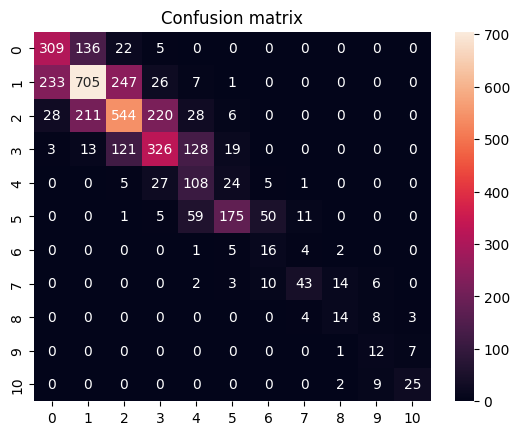

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest to the training data 
rfc =  RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predict on test set
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

# Confusion matrix
cm_dtc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_rfc))

rfc_score = rfc.score(X_test,y_test)
scores["Random Forest Classifier"] = rfc_score  #storing the accuracy score in a dictionary to use later for comparison of models

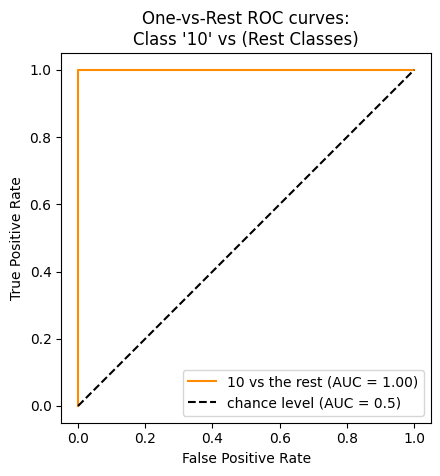

In [ ]:
y_score = rfc.fit(X_train, y_train).predict_proba(X_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClass '10' vs (Rest Classes)")
plt.legend()
plt.show()

**Insight: Random forest is an ensembling technique that combines several decision trees to improve the model performance. Since the decision trees already perform well, combining several decision trees resulted in extremely high performance.**

Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00      1219
           2       1.00      1.00      1.00      1037
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00       170
           5       1.00      1.00      1.00       301
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        78
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        36

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



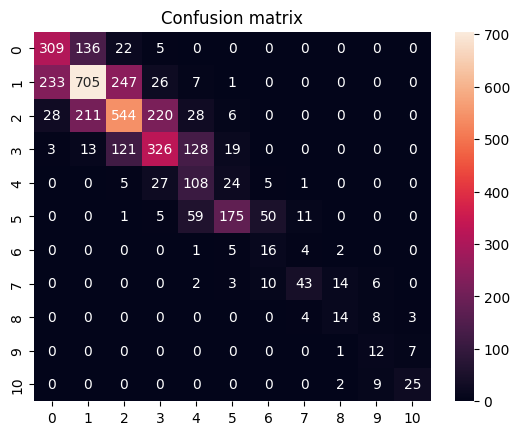

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Fit the gaussian naive bayes to the training data 
nbc = GaussianNB()
nbc.fit(X_train, y_train)

# Predict on test set
y_pred_nbc = nbc.predict(X_test)
y_pred_nbc

# Confusion matrix
cm_nbc = confusion_matrix(y_test, y_pred_nbc)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,y_pred_nbc))

nbc_score = nbc.score(X_test,y_test)
scores["Gaussian Naive Bayes Classifier"] = nbc_score  #storing the accuracy score in a dictionary to use later for comparison of models

**Insight: It is observed that naive bayes algorithm is overfitting the data. Although naive bayes is a simple and efficient model, in cases where the dataset is imbalanced, it fails to function properly. Here, the naive bayes model is memorizing the training data instead of detecting the underlying patterns. So, even though the overall accuracy is high, the model shouldn't be used.**

XGBoost

In [ ]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00      1219
           2       1.00      1.00      1.00      1037
           3       1.00      1.00      1.00       610
           4       1.00      1.00      1.00       170
           5       1.00      1.00      1.00       301
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        78
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        36

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



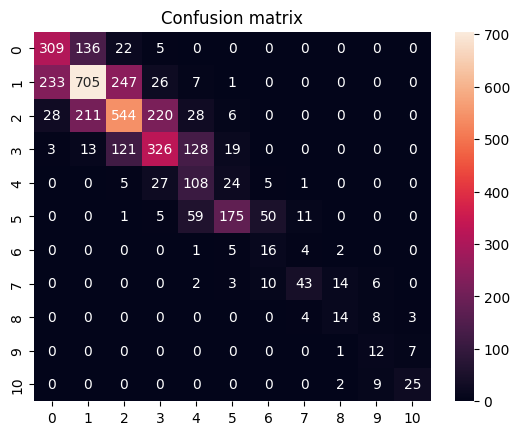

In [ ]:
# Fit XGboost on training data
model_xgb = classifier_xgb.fit(X_train, y_train)

# Predict on test data
prediction_xgb = model_xgb.predict(X_test)

# Confusion matrix
cm_dtc = confusion_matrix(y_test, prediction_xgb)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix')

# Print classification report
print(classification_report(y_test,prediction_xgb))

xg_score = classifier_xgb.score(X_test,y_test)
scores["XG Boost"] = xg_score    #storing the accuracy score in a dictionary to use later for comparison of models

**Insight: Complex models often lead to overfitting. Although XGBoost models exhibit good performance for multi-class classification problems, it is too complex and not useful for this data because it leads to 100% accuarcy indicating overfitting.**

Comparison of models

In [ ]:
# The score dictionary used to store accuracy scores is used to plot a line plot
scores

{'Logistic Regression': 0.631,
 'KNN Classifier': 0.56925,
 'Decision Tree Classifier': 0.95225,
 'Random Forest Classifier': 0.9905,
 'Gaussian Naive Bayes Classifier': 1.0,
 'XG Boost': 1.0}

In [ ]:
score_list = list(scores.items())
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

Logistic Regression Score is 0.63 
KNN Classifier Score is 0.56 
Decision Tree Classifier Score is 0.95 
Random Forest Classifier Score is 0.99 
Gaussian Naive Bayes Classifier Score is 1.0 
XG Boost Score is 1.0 


In [ ]:
acc_scores = scores.values()
acc_scores

dict_values([0.631, 0.56925, 0.95225, 0.9905, 1.0, 1.0])

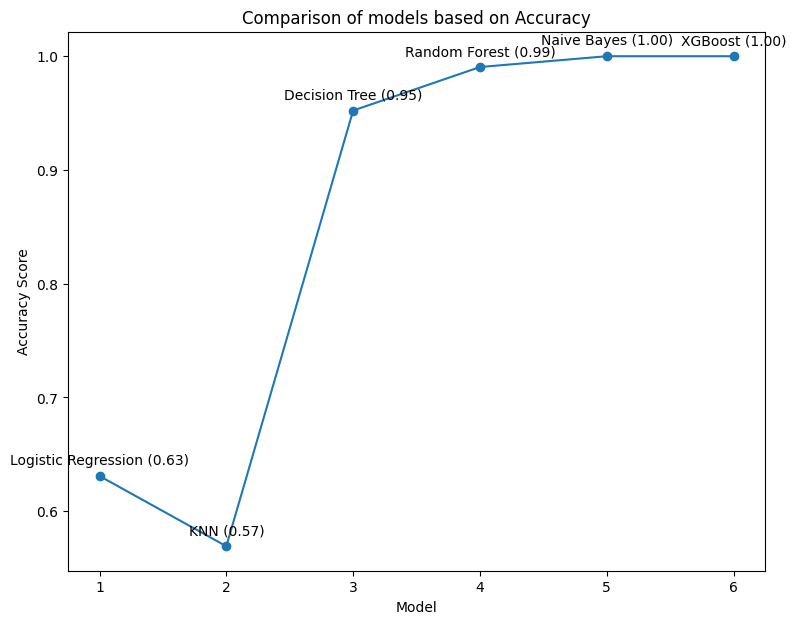

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(range(1, 7), acc_scores, '-o')

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']

# Set the x-axis and y-axis labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')

# Add labels for each point on the graph
for i, acc in enumerate(acc_scores):
    ax.text(i+1, acc+0.01, f'{models[i]} ({acc:.2f})', ha='center')

# Show the graph
plt.title('Comparison of models based on Accuracy')
plt.show()


**Conclusion: While a decision tree can be used for the prediction of hospital stay duration, a random forest classifier yields best results with highest accuracy, precision and F1 score.**